In [0]:
from google.colab import drive 

drive.mount('/content/gdrive')
 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.h5.zip" -d "./"

Archive:  /content/gdrive/My Drive/Colab Notebooks/data.h5.zip
  inflating: ./data1.h5              


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Compiling model...
key is  CNN_Model_1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               15376500  
_____________________________

'below method is used for CNN ensemble'

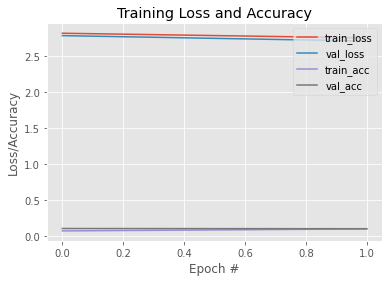

In [0]:
"""
Author: Pranav Srivastava
file: PartA.py
This file has implementation of PartA (i) and (ii)

execution: functions compile_and_train and fetch_and_test_CNNensemble can be used to execute the solutions. Please check the deatils at the bottom of this file
"""

import numpy as np
import h5py
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
import os
from contextlib import redirect_stdout

def loadDataH5():
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()

def plotAccLoss(H, NUM_EPOCHS, path, description):

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc='upper right')


    if not os.path.exists(path):
        os.makedirs(path)

    plt.savefig(path+description)


def save_model_summary(path, cnn_modelname, model, description):
    """
    this function will save the summary of model to the disk
    results become handy when preparing the report
    """

    filename = path+"model_summary"+"_"+cnn_modelname+'_'+description+".txt"

    if not os.path.exists(path):
        os.makedirs(path)

    with open(filename, 'w') as f:
        with redirect_stdout(f):
            model.summary()

def save_execution_summary(path, cnn_modelname, model, testdata, testlabels, description):
    """
    this function will save the execution summary to the disk
    results become handy when preparing the report
    """
    filename = path+"model_evaluate"+"_"+cnn_modelname+'_'+description+".txt"

    if not os.path.exists(path):
        os.makedirs(path)

    with open(filename, 'w') as f:
        with redirect_stdout(f):
            model.evaluate(testdata,testlabels)

def baselineCNN(width, height, depth, classes):
    """Implementation of baseline CNN with single convolutional layer, 
    single pooling layer, fully connected layer and softmax layer.
    """

    model = tf.keras.Sequential()
    inputShape= (height, width, depth)

    # define the first layer
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))

    #pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    #flatten the results
    model.add(tf.keras.layers.Flatten())

    #feed the flattened results into full connected layers
    model.add(tf.keras.layers.Dense(500, activation='relu'))

    #softmax classifier
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))

    return model

def CNN_Model_1(width, height, depth, classes):
    """CNN Model 1"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    # define the first convolutional layer
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))

    #pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #second convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    #pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #flatten the results
    model.add(tf.keras.layers.Flatten())

    #feed the flattened results into full connected layers
    model.add(tf.keras.layers.Dense(500, activation='relu'))

    #softmax classifier
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_2(width, height, depth, classes):
    """CNN Model 2"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    #first convolutional layer
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))

    #first pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #second convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    #second pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #third convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    #third pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    #flatten the results
    model.add(tf.keras.layers.Flatten())

    #feed the flattened results into full connected layers
    model.add(tf.keras.layers.Dense(500, activation='relu'))

    #apply dropout
    model.add(tf.keras.layers.Dropout(0.5))

    #softmax classifier
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_3(width, height, depth, classes):
    """CNN Model 3"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    #first convolutional layer
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))

    #second convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

    #first pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #third convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

    #fourth convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    #second pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    #flatten the results
    model.add(tf.keras.layers.Flatten())

    #feed the flattened results into full connected layers
    model.add(tf.keras.layers.Dense(1000, activation='relu'))

    #apply dropout
    model.add(tf.keras.layers.Dropout(0.5))

    #softmax classifier
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_4(width, height, depth, classes):
    """CNN Model 4"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu')) 
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_5(width, height, depth, classes):
    """CNN Model 5"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_5(width, height, depth, classes):
    """CNN Model 5"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_6(width, height, depth, classes):
    """CNN Model 6"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (64, (3, 3), strides=(2, 2),input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_7(width, height, depth, classes):
    """CNN Model 7"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_8(width, height, depth, classes):
    """CNN Model 8"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (16, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(128, (7, 7), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_9(width, height, depth, classes):
    """CNN Model 9"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (16, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_10(width, height, depth, classes):
    """CNN Model 10"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (16, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def CNN_Model_11(width, height, depth, classes):
    """CNN Model 11 with 1x1 convolutional filter"""

    inputShape = (width, height, depth)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

def compile_and_train(models_dict, batch_size, learning_rate, NUM_EPOCHS, execution_summary):
    """
    - this function is used in both (i) and (ii) of Part A

    - this function is used to compile and train the model
    
    - it acts a trigger when training of various model with variations are to be triggered with some automation

    - model_dict is a very important param in this funtion which is a dictionary of models that are required to be compiled along with the check if the data-augmentation or checkpoint should be applied in the training
    
    """
    # initialize the optimizer and model
    print("Compiling model...")
    opt = keras.optimizers.SGD(lr=learning_rate)

    numTrainingSamples = 1020
    numValidationSamples = 340

    # iterate till all the modelsin the list are compiled and trained
    for key in models_dict:
        checkpoint=False
        data_augmentation=False

        result_path="/content/gdrive/My Drive/Colab Notebooks/Executions/"+key+"/"
        cp_path="/content/gdrive/My Drive/Colab Notebooks/Checkpoints/"+key+"/"

        if not os.path.exists(result_path):
            os.makedirs(result_path)

        if not os.path.exists(cp_path):
            os.makedirs(cp_path)
        
        print("key is ", key)
        model = models_dict[key][0](width=128, height=128, depth=3, classes=17)

        #condition to check if the model should have a checkpoint or data-augmentation option
        if models_dict[key][1] == True and models_dict[key][2] == False:
            checkpoint = True

        if models_dict[key][2] == True and models_dict[key][1] == False:
            data_augmentation = True

        if models_dict[key][1] == True and models_dict[key][2] == True:
            checkpoint = True
            data_augmentation = True


        print(model.summary())
        save_model_summary(path=result_path, cnn_modelname=key, model=model, description=execution_summary)

        model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

        #execute the variants based on the choice specified
        if checkpoint==True and data_augmentation==False:
            fname = cp_path+key+"_"+execution_summary+".hdf5"
            checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

            #trainthenetwork
            print("Trainingnetwork...")
            history=model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=batch_size,epochs=NUM_EPOCHS, callbacks=[checkpoint])

        if checkpoint==False and data_augmentation==True:
            #initialize data generator with various parameters
            trainDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=90, height_shift_range=0.5, width_shift_range=0.3, shear_range=0.2, zoom_range=[0.4,0.9], horizontal_flip=True)
            testDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=90, height_shift_range=0.5, width_shift_range=0.3, shear_range=0.2, zoom_range=[0.4,0.9], horizontal_flip=True)

            #assign train, test data to data generator along with the labels
            train_generator = trainDataGenerator.flow(trainX, trainY, batch_size)
            validation_generator = testDataGenerator.flow(testX, testY, batch_size)
        
            #fit the model on real time data-augmentation
            history = model.fit(
                train_generator,
                steps_per_epoch= numTrainingSamples / batch_size,
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=numValidationSamples / batch_size)


        if checkpoint==True and data_augmentation==True:
            fname = cp_path+key+"_"+execution_summary+".hdf5"
            checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

            #initialize data generator with various parameters
            trainDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=90, height_shift_range=0.5, width_shift_range=0.3, shear_range=0.2, zoom_range=[0.4,0.9], horizontal_flip=True)
            testDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=90, height_shift_range=0.5, width_shift_range=0.3, shear_range=0.2, zoom_range=[0.4,0.9], horizontal_flip=True)

            #assign train, test data to data generator along with the labels
            train_generator = trainDataGenerator.flow(trainX, trainY, batch_size)
            validation_generator = testDataGenerator.flow(testX, testY, batch_size)
        
            #fit the model on real time data-augmentation
            history = model.fit(
                train_generator,
                steps_per_epoch= numTrainingSamples / batch_size,
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=numValidationSamples / batch_size,
                callbacks=[checkpoint])
        

        if checkpoint==False and data_augmentation==False:
            #trainthenetwork
            print("Trainingnetwork...")
            history=model.fit(trainX,trainY,validation_data=(testX,testY),batch_size=batch_size,epochs=NUM_EPOCHS)
            
            #exe_graph_name_loc = "Executions/"+key+"/"+key+"_"+execution_summary+".png"
        
        #evaluate the test accuracy
        print ("Test Data Loss and Accuracy: ", model.evaluate(testX, testY))        
        save_execution_summary(path=result_path, cnn_modelname=key, model=model, testdata=testX, testlabels=testY, description=execution_summary)

        #plot and save the results in the graph
        graph_description = key+"_"+execution_summary+".png"        
        plotAccLoss(H=history, NUM_EPOCHS=NUM_EPOCHS, path=result_path, description=graph_description)


def fetch_and_test_CNNensemble():
    """
    This fucntion is imoplemeted for Part A (ii)

    It is used to fetch the weights for the trained models and later apply CNN ensemble   
    """

    models = []

    #this is the dictionary that specifies which all trained models will be used for CNN ensemble
    ensemble_models = models_dict = {
    'CNN_Model_1':CNN_Model_1,
    'CNN_Model_2':CNN_Model_2, 
    'CNN_Model_3':CNN_Model_3,
    'CNN_Model_4':CNN_Model_4, 
    'CNN_Model_5':CNN_Model_5, 
    'CNN_Model_6':CNN_Model_6, 
    'CNN_Model_11':CNN_Model_11,
    'CNN_Model_8':CNN_Model_8,
    'CNN_Model_9':CNN_Model_9, 
    'CNN_Model_10':CNN_Model_10
    }
    for key in ensemble_models:
        print("key is ", key)
        #model = baselineCNN(width=128, height=128, depth=3, classes=17)
        model = ensemble_models[key](width=128, height=128, depth=3, classes=17)
        
        fname = "Checkpoints/"+key+"/"+key+"_base_learners_with_checkpoint"+".hdf5"
        model.load_weights(fname)
        opt = keras.optimizers.SGD(lr=0.01)
        model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
        models.append(model)
    
    print("models-->", models)
    #outputs = [model.outputs[0] for model in models]
    pred = keras.layers.Average()([model.predict_proba(testX) for model in models])
    print("pred avg---",pred)
    pred = tf.math.argmax(pred, axis = -1)
    print("384 predictions--->", pred)

    print("labels-->", testY.shape)
    
    equality = tf.equal(pred, testY)
    reduce_t = tf.reduce_all(equality)
    print(equality)

    count = (tf.reduce_sum(tf.cast(equality,tf.float32)))
    print(count)
    print("ensemble accuracy-->",tf.math.divide(count, testY.shape)[0])


###############################################################################
#                        execution details below
###############################################################################

"""
please create folders 'Executions' and 'Checkpoints' as the results will be stored there
"""

"""model_dict is a dictionary of CNN models that are required to be compiled.
It also has a flag to check if the data-augmentation or checkpoint 
should be applied in the training

for example - [CNN_Model_1, checkpoint=True, data-augmentation=True] means CNN_Model_1 model should be trained with checkpoint and data augmentation
"""

models_dict = {
'CNN_Model_1':[CNN_Model_1, True, True]
}

execution_summary = "base_learners_with_checkpoint"



"""below method can be called to train the network. Please check the function parameters and models_dict for appropriate values"""
#compile_and_train(models_dict=models_dict, batch_size=32, learning_rate=0.01, NUM_EPOCHS=100, execution_summary=execution_summary)

"""below method is used for CNN ensemble"""
#fetch_and_test_CNNensemble()